# 서울시에서 일어나는 범죄와 체감 안전도
: 강남3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [492]:
import pandas as pd

In [493]:
crime_anal_police = pd.read_csv("../Data/crime_in_Seoul.csv",encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [494]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [495]:
# 관서명 강서서 검색하기
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [496]:
police_address = pd.read_csv("../Data/SeoulPoliceAddress.csv")
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [497]:
# 관서명 서울--경찰서로 만들기 
# Method 1
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append("서울"+name[:-1]+"경찰서") 
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [498]:
# Method 2

# station_name = []
# list("서울"+crime_anal_police['관서명'].str[-1]+"경찰서")
# station_name

In [499]:
# 경찰서 갯수 확인
len(station_name)

31

In [500]:
len(police_address)

31

In [501]:
len(crime_anal_police)

31

In [502]:
# # 네이버 API를 통해 경찰서 위도 경도 나타내기

# import urllib.request

# client_id = "h2tcgb9fgs"
# client_secret = "NPS3aLITU1cb1QcTUXuMTDrblGi9OAgoLSJS7dZD"

# lat = []
# lng = []
# ext = []
# for n in police_address['주소']:
#     encText = urllib.parse.quote(n)
#     url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON
#     request = urllib.request.Request(url)
#     request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
#     request.add_header("X-NCP-APIGW-API-KEY",client_secret)

#     response = urllib.request.urlopen(request)
#     rescode = response.getcode()

#     if rescode == 200:
#         response_body = response.read()
#         enText = response_body.decode('utf-8')
#     else:
#         print("Error Code:"+ rescode)

#     import json
#     data1 = json.loads(enText)

#     try:
#         lng.append(data1['addresses'][0]['x'])
#         lat.append(data1['addresses'][0]['y'])
#     except:
#         ext.append(n)
# print(data1)

In [503]:
# police_address['lng'] = lng
# police_address['lat'] = lat

In [504]:
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [505]:
#police_address.to_csv("../Data/SeoulPoliceAddress_latlng.csv",index=False)

In [506]:
# 2개의 File에 경찰관서 동일한 이름인지 확인
len(station_name == police_address['경찰관서']) # 글자와 순서가 동일

31

In [507]:
# 경찰서의 주소 중 구만 추출하여 crime_anal_police의 구별이라는 컬럼생성하기 => 2번째가 구가 아닐 경우 해당 코드로 실행안됨

# sol 1)
crime_anal_police['구별'] = [region.split()[1] for region in police_address['주소']]
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [508]:
# 주소 중 2번째 단어의 끝에 '구'이름만 출력하기

# sol 2)
gu_name = []

for name in police_address['주소']:
    temp = name.split() # 주소를 공백으로 나누기
    temp_gu = [gu for gu in temp if gu[-1]=='구'][0] # 구로 끝나는 문자열만 temp_gu에 저장
    gu_name.append(temp_gu)

In [509]:
len(gu_name)

31

In [510]:
# list의 중복값 확인

len(set(gu_name)) # DataFame과 달리 unique를 사용할 수 없으므로 List는 set()을 이용

23

In [511]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [512]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재는 금천서는 금천구로 편성되어 있음
crime_anal_police.loc[crime_anal_police['관서명'] == '금천서',['구별']] = '금천구'

In [513]:
# DataSet을 보면 강서서가 양천구로 편성되어 있는데 현재는 강서서는 강서구로 편성되어 있음
crime_anal_police.loc[crime_anal_police['관서명'] == '강서서',['구별']] = '강서구'

In [514]:
# 확인
len(crime_anal_police['구별'].unique())

25

In [515]:
# csv 저장
crime_anal_police.to_csv("../Data/Seoul_crime_include_gu_name.csv",index=False)

In [516]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


> 관서명으로 데이터를 정리하는 것이 아니고, 구별로 데이터를 정리해야한다.

In [517]:
len(crime_anal_police)

31

In [518]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
 11  구별      31 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.0+ KB


In [519]:
data = []
for n in range(len(crime_anal_police['절도 발생'])):
    data.append(crime_anal_police['절도 발생'][n].replace(',',''))
data

['1395',
 '1070',
 '1153',
 '1812',
 '1114',
 '1557',
 '953',
 '1981',
 '2555',
 '2964',
 '1607',
 '1865',
 '3026',
 '819',
 '1434',
 '1567',
 '2135',
 '2411',
 '2706',
 '2096',
 '2366',
 '832',
 '2335',
 '1982',
 '1890',
 '3239',
 '2193',
 '653',
 '1095',
 '1063',
 '1439']

In [520]:
data1 = []
for n in range(len(crime_anal_police['절도 검거'])):
    data1.append(crime_anal_police['절도 검거'][n].replace(',',''))
data1

['477',
 '413',
 '382',
 '738',
 '424',
 '587',
 '409',
 '814',
 '813',
 '978',
 '597',
 '661',
 '1277',
 '293',
 '618',
 '888',
 '829',
 '984',
 '827',
 '1260',
 '789',
 '332',
 '889',
 '905',
 '672',
 '1129',
 '801',
 '186',
 '418',
 '478',
 '666']

In [521]:
data2 = []
for n in range(len(crime_anal_police['폭력 발생'])):
    data2.append(crime_anal_police['폭력 발생'][n].replace(',',''))
data2

['1355',
 '1278',
 '869',
 '2056',
 '1015',
 '2050',
 '1194',
 '2548',
 '2983',
 '3572',
 '1612',
 '1910',
 '2625',
 '1192',
 '2649',
 '2054',
 '2847',
 '2465',
 '3298',
 '3207',
 '2712',
 '1015',
 '3007',
 '1852',
 '2509',
 '3295',
 '2723',
 '547',
 '1461',
 '1487',
 '1819']

In [522]:
data3 = []
for n in range(len(crime_anal_police['폭력 검거'])):
    data3.append(crime_anal_police['폭력 검거'][n].replace(',',''))
data3

['1170',
 '1070',
 '794',
 '1711',
 '861',
 '1704',
 '1015',
 '2227',
 '2519',
 '2961',
 '1395',
 '1587',
 '2180',
 '1038',
 '2348',
 '1776',
 '2407',
 '2146',
 '2642',
 '2718',
 '2248',
 '840',
 '2432',
 '1607',
 '2030',
 '2786',
 '2329',
 '491',
 '1268',
 '1303',
 '1559']

In [523]:
crime_anal_police['절도 발생'] = data
crime_anal_police['절도 검거'] = data1
crime_anal_police['폭력 발생'] = data2
crime_anal_police['폭력 검거'] = data3

In [524]:
crime_anal_police[['절도 발생','절도 검거','폭력 발생','폭력 검거']] =\
    crime_anal_police[['절도 발생','절도 검거','폭력 발생','폭력 검거']].astype('int')

In [525]:
# another sol )
# crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(',','').astype(int)

In [526]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [527]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [528]:
# 구별로 데이터를 정리한다. 
crime_anal = pd.pivot_table(crime_anal_police,index='구별',aggfunc='sum')
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [529]:
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] *100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] *100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] *100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] *100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] *100


In [530]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [531]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

In [532]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다.

In [533]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다.

# sol 1)
crime_anal[crime_anal.iloc[:,5:] >100] = 100

In [534]:
# sol 2)

# updateList = [['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']]
# for i in updateList:
#     crime_anal[crime_anal[i] > 100,[i]] = 100

In [535]:
# sol 3)

# crime_anal[crime_anal['강간검거율'] >100, ['강간검거율']] = 100
# crime_anal[crime_anal['강도검거율'] >100, ['강도검거율']] = 100
# crime_anal[crime_anal['살인검거율'] >100, ['살인검거율']] = 100
# crime_anal[crime_anal['절도검거율'] >100, ['절도검거율']] = 100
# crime_anal[crime_anal['폭력검거율'] >100, ['폭력검거율']] = 100

In [536]:
crime_anal.rename(columns={
    '강간 발생':'강간',
    '강도 발생':'강도',
    '살인 발생':'살인',
    '절도 발생':'절도',
    '폭력 발생':'폭력'
    },inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


---
# 데이터의 정규화(Normalization)
- 강도와 살인은 2자릿수이나 절도와 폭력은 4자리입니다.
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리합니다.
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋습니다.

In [537]:
# 머신러닝 모듈 사용하기
# sklearn의 preprocessing기능을 사용하면 최대값과 최솟값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [538]:
# 정규화를 진행할 컬럼 설정
col = ['강간','강도','살인','절도','폭력']

In [539]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [540]:
# 최대값과 최소값의 값 가져오기
min_max_scalar = preprocessing.MinMaxScaler()
min_max_scalar

MinMaxScaler()

In [541]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float 설정
x_scaled = min_max_scalar.fit_transform(x.astype(float)) # 학습시키는 것을 fit
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [542]:
# 정규화된 범죄건수가 있는 새로운 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [543]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [544]:
result_CCTV = pd.read_csv("../Data/CCTV_Result.csv",index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [545]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [546]:
# 정규화된 범죄 발생건수를 합하여 범죄 컬럼 생성 

crime_anal_norm['범죄'] = crime_anal_norm.iloc[:,:5].sum(axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [547]:
# 검거율도 통합하여 컬럼 생성

col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = crime_anal_norm[col].sum(axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


---
# Seaborn을 활용한 시각화

In [548]:
import matplotlib.pyplot as plt

In [549]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [550]:
import seaborn as sns

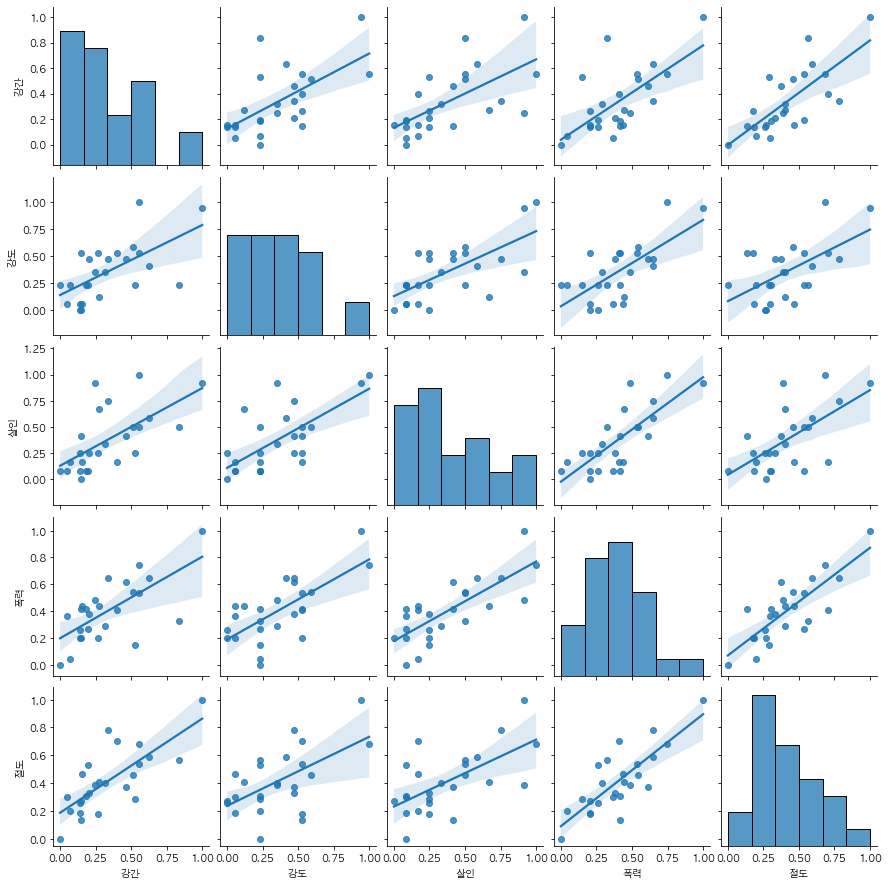

In [551]:
# 강간, 강도, 살인, 폭력, 절도 건수에 대한 상관관계 시각화

sns.pairplot(
    crime_anal_norm,
    vars=['강간', '강도', '살인', '폭력', '절도'],
    kind='reg'
)
plt.show()

> 5대범죄 모두 양의 상관관계<br>
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다.


### CCTV와 살인, 강도에 대한 그래프

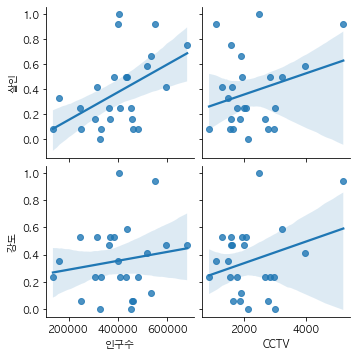

In [552]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인','강도'],
    kind='reg'
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생수도 증가한다. <br>
> 특히, 강도보다는 살인 발생수가 훨씬 많이 증가한다. <br>
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다. <br>
> 따라서 CCTV가 없을때 살인 사건이 발생수가 증가한다. <br>
> => CCTV의 대수가 적을때 살인발생수가 적은 쪽이 많이 분포되어있다. 

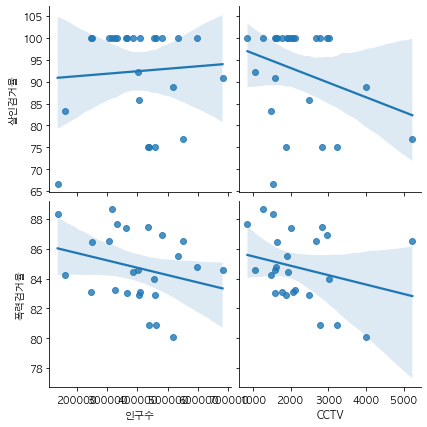

In [553]:
### 인구수, CCTV와 살인 검거율, 폭력 검거율을 회귀선으로 확인 후 Comment

sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인검거율','폭력검거율'],
    kind='reg',
    height = 3
)
plt.show()

> CCTV가 많아진다고 해서 폭력, 살인 검거율이 높아지지는 않는다.<br>
> CCTV와 검거율은 역상관을 보이나, 살인검거율이 폭력검거율보다 높은 상관관계를 보인다. <br>
> 인구수 증가와 살인검거율은 상관관계가 거의 없다. <br>
> 가정 => 범죄예방 CCTV보다 차량단속 CCTV의 비중이 높다 

---
### heatmap을 이용한 전체 검거율 확인

In [554]:
# 검거 최대값 가져오기
tmp_max = crime_anal_norm['검거'].max()

# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100 

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


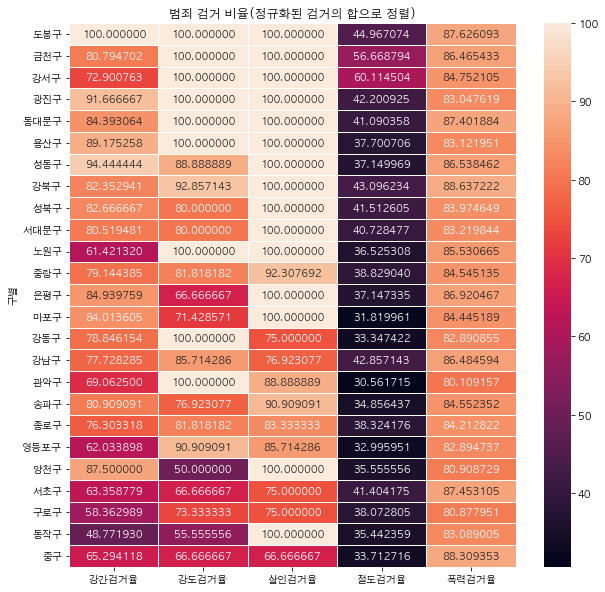

In [555]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot = True,
    fmt = 'f', 
    linewidths=0.5
)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

> 절도검거율이 다른 검거율에 비해 매우 저조하다.    
> 검거율이 우수한 지역은 도봉구, 광진구, 성동구, 용산구

In [556]:
### heatmap을 이용한 범죄 발생율 확인

# 범죄의 최대값을 100으로 설정하고 범죄 계산하기
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄',ascending=False)


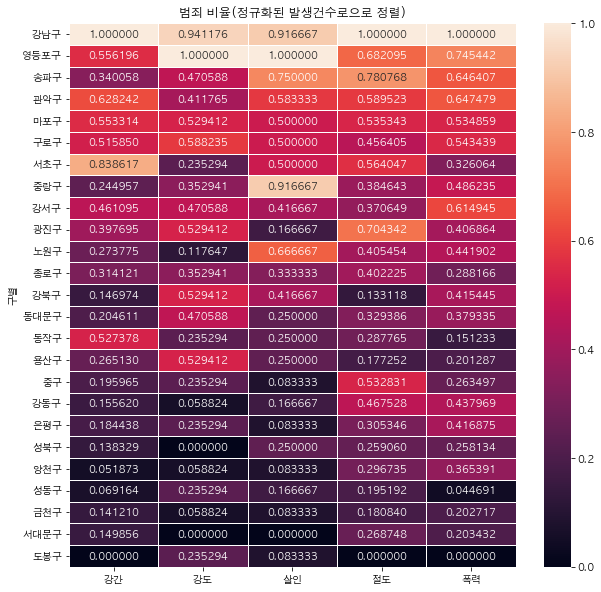

In [557]:
target_col = ['강간','강도','살인','절도','폭력']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot = True,
    fmt = 'f', 
    linewidths=0.5
)
plt.title('범죄 비율(정규화된 발생건수로으로 정렬)')
plt.show()

In [558]:
# 저장하기
crime_anal_norm.to_csv("../Data/seoul_crime_norm.csv")

# 지도 출력

In [559]:
import json
import folium

In [560]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [561]:
# 살인 건수를 서울시 지도에 출력

map = folium.Map(
    location=[37.5502,126.982],
    zoom_start = 10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data = crime_anal_norm,
    columns=[crime_anal_norm.index,'살인'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
map

In [562]:
# 강간 건수를 서울시 지도에 출력

map = folium.Map(
    location=[37.5502,126.982],
    zoom_start = 10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data = crime_anal_norm,
    columns=[crime_anal_norm.index,'강간'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
map

In [563]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 100000 # 10만명 당 범죄발생 비율

pop_crime = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 100000
crime_anal_norm['pop_crime'] = pop_crime
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,pop_crime
구별,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,3.697074,0.176682
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.257321,3.700844,0.056301
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.328323,4.069435,0.103654
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.466789,4.177674,0.078359
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,3.686223,0.110724


In [564]:
map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns= [crime_anal_norm.index,'pop_crime'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
map